# US Airline Passenger Satisfaction


## Latar Belakang
Tidak diragukan lagi bahwa kepuasan pelanggan memiliki pengaruh besar terhadap suatu bisnis. Kepuasan pelanggan dan kualitas produk merupakan faktor utama dari kinerja perusahaan , yang telah dikonfirmasi oleh banyak penelitian [(Matzler et al.,2004).](https://www.sciencedirect.com/science/article/abs/pii/S0019850103000555) Kepuasan penumpang menjadi ukuran yang menentukan seberapa baik pelayanan memenuhi harapan penumpang.

Suatu maskapai penerbangan Amerika Serikat (AS) melakukan survei dengan tujuan untuk mengetahui kepuasan penumpang agar dapat meningkatkan kualitas pelayanan maskapai yang akan berdampak pada kinerja perusahaan, baik secara finansial maupun non-finansial.

## Pernyataan Masalah
**Perusahaan ingin melakukan evaluasi pelayanan maskapai berbasis kepuasan penumpang.** Penumpang maskapai penerbangan AS diminta untuk memberikan penilaian dengan rentang 1(buruk) sampai dengan 5(baik) terhadap pelayanan maskapai yang meliputi aspek kebersihan, kenyamanan, layanan check-in, dan lainnya.  Informasi ini akan membantu perusahaan untuk menentukan aspek pelayanan yang harus dipertahankan dan aspek yang membutuhkan peningkatan kualitas, agar *improvement* yang dilakukan tepat sasaran dan efisien. 

Berikut rumusan masalah dari pernyataan diatas:
1. Apakah penumpang merasa puas dengan layanan yang diberikan?
2. Apa saja faktor yang mempengaruhi kepuasan penumpang?
3. Apa rekomendasi yang dapat diberikan untuk meningkatkan kualitas pelayanan?


## Data
Dataset yang digunakan merupakan hasil survei kepuasan penumpang maskapai penerbangan AS dengan content seperti biodata penumpang dan kepuasan penumpang terhadap layanan yang diberikan. Untuk mengakses dataset [klik di sini.](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) Dari link tersebut, disebutkan bahwa data sudah dimodifikasi dan dibersihkan.

### Content

##### Adapun isi dari dataset, yaitu sebagai berikut:

* ID : Nomor unik masing-masing penumpang
* Gender: Jenis Kelamin penumpang (*Female* (Perempuan), *Male*(Laki-laki))
* Customer Type: Tipe penumpang (*Loyal Customer*, *disloyal customer*)
* Age: Umur penumpang
* Type of Travel: Tujuan penerbangan (*Personal Travel*,*Business Travel*)
* Class: Kelas penerbangan (*Business*, *Eco*, *Eco Plus*)
* Flight distance: Jarak penerbangan
* Inflight wifi service: Level kepuasan terhadap wifi dalam penerbangan (0:*Not Applicable*;1-5)
* Departure/Arrival time convenient: Level kepuasan terhadap keberangkatan atau kedatangan
* Ease of Online booking: Level kepuasan terhadap pemesanan tiket secara online
* Gate location: Level kepuasan terhadap lokasi pintu gerbang
* Food and drink: Level kepuasan terhadap makanan dan minuman
* Online boarding: Level kepuasan terhadap *boarding* online
* Seat comfort: Level kepuasan terhadap kenyamanan kursi
* Inflight entertainment: Level kepuasan terhadap hiburan dalam penerbangan
* On-board service: Level kepuasan terhadap pelayanan *on-board*
* Leg room service: Level kepuasan terhadap ruang kaki
* Baggage handling: Level kepuasan terhadap penanganan bagasi
* Check-in service: Level kepuasan terhadap pelayanan *check-in*
* Inflight service: Level kepuasan terhadap pelayanan dalam penerbangan
* Cleanliness: Level kepuasan terhadap kebersihan
* Departure Delay in Minutes: Menit keterlambatan keberangkatan
* Arrival Delay in Minutes: Menit keterlambatan kedatangan
* Satisfaction: Tingkat Kepuasan Pelanggan(*Satisfaction*, *neutral* *or* *dissatisfaction*)

### Preparation
Persiapan yang dilakukan meliputi *import library* yang dibutuhkan dan menyiapkan dataset

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency

In [2]:
# Import Dataset
DatasetExcel = pd.read_csv('airline passanger satisfaction.csv')

# Copy dari dataset yang akan digunakan
df = DatasetExcel.copy()
pd.set_option("display.max_columns", None)
# Melihat 5 baris teratas dan terbawah dari data
display(df.head(), df.tail())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


### Data Understanding and Data Cleaning

Langkah pertama yang dilakukan adalah data understanding dan data cleaning. Hal ini diperlukan untuk memahami isi dataset, dan mendeteksi apabila ada *error* atau *corrupt* pada data guna memaksimalkan hasil analisa. 

##### A) Data Understanding, Mengidentifikasi Adanya Duplikat, dan Memeriksa Format Data
Mengenal info kolom dan baris dari dataset, memeriksa data duplikat dan format data, serta menghapus kolom yang tidak relevan

In [3]:
# Untuk Mengetahui jumlah baris dan kolom

a,b = df.shape
print(f'Pada dataset terdapat {a} baris dan {b} kolom')


Pada dataset terdapat 103904 baris dan 25 kolom


In [4]:
# Untuk mengetahui info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Banyak nama kolom yang menggunakan spasi, sehingga untuk menghindari adanya error, nama kolom akan diubah, sebagai berikut:

In [5]:
# Mengganti nama kolom
dfnew = df.rename(columns={'Unnamed: 0':'Unnamed: 0', 'id':'id','Gender':'Gender','Customer Type':'Customer_Type', 'Age':'Age','Type of Travel':'Type_of_Travel','Class':'Class','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_Wifi_Service','Departure/Arrival time convenient':'Departure_Arrival_Time_Convenient','Ease of Online booking':'Ease_of_Online_Booking','Gate location':'Gate_Location','Food and drink':'Food_and_Drink','Online boarding':'Online_Boarding','Seat comfort':'Seat_Comfort','Inflight entertainment':'Inflight_Entertainment','On-board service':'On_Board_Service','Leg room service':'Leg_Room_Service','Baggage handling':'Baggage_Handling','Checkin service':'Checkin_Service','Inflight service':'Inflight_Service','Cleanliness':'Cleanliness','Departure Delay in Minutes':'Departure_Delay_in_Minutes','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes','satisfaction':'Satisfaction'})
dfnew.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Untuk menunjukkan statistik deskriptif masing-masing kolom
display(dfnew.describe(), dfnew.describe(include='object'))

,Unnamed: 0,id,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer_Type,Type_of_Travel,Class,Satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


ID merupakan primary key dari data, disini akan dicek terlebih dahulu apabila data survey ada duplikat id atau tidak, untuk memastikan semua penumpang mengisi sekali dan tidak adanya kesalahan pada saat input data

In [7]:
# Cek id duplicate
dfnew['id'].duplicated().sum()

0

In [8]:
pd.set_option('display.max_colwidth',1)
# data unik di tiap kolom
listItem = []
for col in dfnew.columns :
    listItem.append( [col, dfnew[col].nunique(), dfnew[col].unique()])

TabelUnik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
TabelUnik

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
2,Gender,2,"[Male, Female]"
3,Customer_Type,2,"[Loyal Customer, disloyal Customer]"
4,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
5,Type_of_Travel,2,"[Personal Travel, Business travel]"
6,Class,3,"[Eco Plus, Business, Eco]"
7,Flight_Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
8,Inflight_Wifi_Service,6,"[3, 2, 4, 1, 5, 0]"
9,Departure_Arrival_Time_Convenient,6,"[4, 2, 5, 3, 1, 0]"


Ada beberapa hal yang bisa dipahami dari kolom diatas antara lain:
1. Nilai unik dan jumlah baris pada kolom ID sama yaitu 103904, dan sudah dipastikan dengan fungsi duplikat sama dengan nol. Dapat disimpulkan bahwa tidak ada duplikat ID/data. Untuk analisa selanjutnya kolom ID dan kolom unnamed tidak relevan sehingga akan dihapus.
2. Rentang nilai pada *service* yang diberikan seharusnya bernilai 1(buruk) sampai dengan 5(baik). Nilai 0 yang diberikan diasumsikan bahwa responden tidak mengisi kolom service tersebut. 
3. Nilai kepuasan pelanggan hanya dibagi menjadi dua kategori, yaitu netral atau tidak puas, dan puas.
4. Data tidak memiliki kesalahan pada format penulisan.  


In [9]:
# Menghapus Kolom yang tidak relevan, Unnamed dan ID
dfnew.drop(['Unnamed: 0','id'], axis = 1,inplace= True)
dfnew.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##### B) Mendeteksi Missing Value
Selanjutnya akan di cek apabila terdapat missing value pada data:

In [10]:
# Cek Missing Value seluruh kolom
dfnew.isna().sum()


Gender                               0  
Customer_Type                        0  
Age                                  0  
Type_of_Travel                       0  
Class                                0  
Flight_Distance                      0  
Inflight_Wifi_Service                0  
Departure_Arrival_Time_Convenient    0  
Ease_of_Online_Booking               0  
Gate_Location                        0  
Food_and_Drink                       0  
Online_Boarding                      0  
Seat_Comfort                         0  
Inflight_Entertainment               0  
On_Board_Service                     0  
Leg_Room_Service                     0  
Baggage_Handling                     0  
Checkin_Service                      0  
Inflight_Service                     0  
Cleanliness                          0  
Departure_Delay_in_Minutes           0  
Arrival_Delay_in_Minutes             310
Satisfaction                         0  
dtype: int64

Dapat dilihat bahwa missing value terdapat pada kolom `Arrival_Delay_in_Minutes`. Akan dilakukan cek persentase data kosong: 

In [11]:
# Cek persentase data kosong
persentase = (dfnew['Arrival_Delay_in_Minutes'].isna().sum()/dfnew.shape[0]*100)
print(f'Nilai persentase missing value pada `Arrival_Delay_in_Minutes yaitu {persentase}')


Nilai persentase missing value pada `Arrival_Delay_in_Minutes yaitu 0.29835232522328303


Persentase data kosong pada kolom `Arrival_Delay_in_Minutes` kecil, hal selanjutnya yang dilakukan adalah menangani *missing value*. Terdapat 2 data mengenai keterlambatan, yaitu `Arrival_Delay_in_Minutes` dan `Departure_Delay_in_Minutes`. Hal yang mungkin terjadi adalah apabila terjadi keterlambatan pada saat keberangkatan, maka akan terjadi juga keterlambatan saat kedatangan. Sehingga hal yang dilakukan berikutnya adalah melakukan analisa korelasi pada kedua kolom tersebut. Jika terbukti ada korelasi kuat antara dua variabel atau metrik, dan salah satunya diamati bertindak dengan cara tertentu, maka dapat disimpulkan bahwa variabel atau metrik lainnya juga terpengaruh dengan cara yang sama. 

In [12]:
# Cek distribusi kolom
stats, pval=normaltest(dfnew['Departure_Delay_in_Minutes'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [13]:
# Karena distribusi tidak normal, sehingga dilakukan analisa korelasi dengan metode Spearman
dfnew[['Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes']].corr('spearman')

,Arrival_Delay_in_Minutes,Departure_Delay_in_Minutes
Arrival_Delay_in_Minutes,1.000000,0.740843
Departure_Delay_in_Minutes,0.740843,1.000000


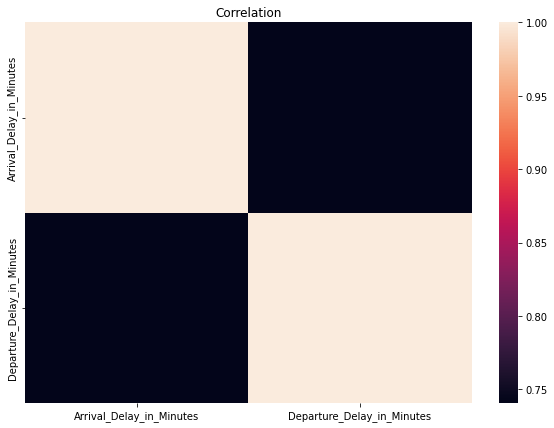

In [14]:
# Cek korelasi keterlambatan keberangkatan dan kedatangan
plt.figure(figsize = (10,7))
sns.heatmap(dfnew[['Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes']].corr('spearman'))
plt.title('Correlation')
plt.show()

Karena korelasi dua kolom tersebut cukup tinggi yaitu 74,1%, dan kolom keterlambatan kedatangan memiliki *missing value*, maka langkah yang dipilih untuk menangani *missing value* adalah dengan menghapus kolom Keterlambatan Kedatangan. Untuk faktor keterlambatan kedepannya akan dianalisa menggunakan kolom Keterlambatan Keberangkatan. 

In [15]:
dfnew.drop('Arrival_Delay_in_Minutes',axis=1,inplace=True)
dfnew

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


##### C) Memahami outlier pada data:
Outlier merupakan data yang berbeda secara signifikan dari data pengamatan lain. Outlier dapat berpengaruh pada hasil pengambilan keputusan setelah analisa. Ada beberapa faktor yang menyebabkan munculnya data outlier yaitu kesalahan penginputan data, fakta dilapangan memang seperti itu, subject tidak mengerti satuan pertanyaan, dan sebagainya.

In [16]:
# Kita akan mengamati data flight distance dan departure delay in minutes
dfnew[['Flight_Distance','Departure_Delay_in_Minutes']].describe()

,Flight_Distance,Departure_Delay_in_Minutes
count,103904.000000,103904.000000
mean,1189.448375,14.815618
std,997.147281,38.230901
min,31.000000,0.000000
25%,414.000000,0.000000
50%,843.000000,0.000000
75%,1743.000000,12.000000
max,4983.000000,1592.000000


Dilakukan pengamatan outlier pada data dengan menggunakan boxplot

<AxesSubplot:xlabel='Departure_Delay_in_Minutes'>

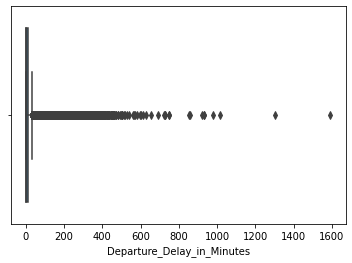

In [17]:
# Outlier pada kolom Departure Delay in Minutes
sns.boxplot(x=dfnew['Departure_Delay_in_Minutes'])

In [18]:
# Cek maksimum keterlambatan keberangkatan
hasilhari = 1592//1440
sisamenit = 1592%1440
hasiljam = sisamenit//60
hasilmenit = (sisamenit%60)

print(f'Waktu maksimum keterlambatan keberangkatan adalah {hasilhari} hari {hasiljam} jam {hasilmenit} menit')

Waktu maksimum keterlambatan keberangkatan adalah 1 hari 2 jam 32 menit


Dari boxplot diatas, dapat dilihat banyaknya outlier. Akan tetapi hal ini memungkinkan untuk terjadi, contohnya untuk data maximum pada Keterlambatan Keberangkatan adalah 1 hari 2 jam 32 menit, dimana data tersebut masuk akal untuk terjadi seperti adanya reschedule pada pesawat.

Selanjutnya untuk kolom flight distance, data tidak dijelaskan satuannya, sehingga diasumsikan menggunakan miles. Nilai minimum jarak tempuh adalah 31miles dan maximumnya 4983miles. Berikut pengamatan outlier jarak tempuh. 

<AxesSubplot:xlabel='Flight_Distance'>

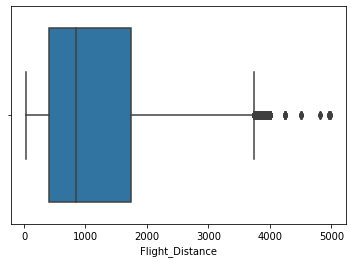

In [19]:
# Outlier pada kolom Flight Distance
sns.boxplot(x=dfnew['Flight_Distance'])

Dapat dilihat grafik diatas bahwa terdapat beberapa outlier. Akan dilakukan analisa upper dan lower bound untuk mengetahui persentase outlier. 

In [20]:
Q1 = dfnew['Flight_Distance'].quantile(0.25)
Q3 = dfnew['Flight_Distance'].quantile(0.75)
IQR = Q3 - Q1
print(f'Nilai quantil satu adalah {Q1}')
print(f'Nilai quantil tiga adalah {Q3}')
print(f'Nilai selisih Q3 dan Q1 adalah {IQR}')

Nilai quantil satu adalah 414.0
Nilai quantil tiga adalah 1743.0
Nilai selisih Q3 dan Q1 adalah 1329.0


In [21]:
lower_bound =  Q1 - (1.5 * IQR)
upper_bound =  Q3 + (1.5 * IQR)

condition = (df['Flight Distance']< lower_bound) | (df['Flight Distance']> upper_bound)

outlier = df.loc[condition, 'Flight Distance'].count()

PersentaseOutlier = outlier/df['Flight Distance'].count()*100
print(f'''Nilai batas bawah jarak tempuh adalah {lower_bound} (dalam hal ini jarak tempuh tidak mungkin negatif, dianggap 0), dan nilai batas atas jarak tempuh adalah {upper_bound} miles, terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')

Nilai batas bawah jarak tempuh adalah -1579.5 (dalam hal ini jarak tempuh tidak mungkin negatif, dianggap 0), dan nilai batas atas jarak tempuh adalah 3736.5 miles, terdapat 2291 data yang menyimpang dari data biasanya, yaitu sebanyak 2.2%


Dari data diatas dapat dilihat bahwa outlier sebanyak 2,2%, data tersebut tergolong kecil. Tetapi, data outlier bisa saja terjadi karena pada umumnya pesawat dapat beroperasi sampai dengan jarak maksimum 8000miles. Sehingga untuk sekarang, data tidak ditindaklanjuti. 

### Hasil Data Understanding dan Data Cleaning
Setelah melewati proses data cleaning, data sudah siap untuk dianalisa. Terdapat beberapa kesimpulan pemahaman dari proses data understanding dan data cleaning

In [22]:
# Data siap dianalisa
display(dfnew.head(),dfnew.tail())

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,neutral or dissatisfied
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,neutral or dissatisfied


In [23]:
# Untuk mempermudah analisa, khusus untuk kolom rating hasil survey akan dibuat tabel baru
kolom = pd.Series(dfnew.columns)
TabelRating = pd.DataFrame(columns=kolom[6:20], data= dfnew[:])
TabelRating['Satisfaction']=dfnew['Satisfaction'][:]
TabelRating.head()

,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


Berikut beberapa kesimpulan dari data understanding dan data cleaning:
* Pada dataset terdapat 103904 baris dan 25 kolom (22 kolom setelah dipilah)

* Nilai unik dan jumlah baris pada kolom ID sama yaitu 103904, dapat disimpulkan bahwa tidak ada duplikat ID/data. Kolom `Unnamed : 0` dan `id` dihapus karena tidak relevan untuk analisa kedepannya. Selain itu, tidak terdapat data dengan format penulisan yang salah. 

* Nilai *rating* yang ditetapkan dinilai dari 1(buruk) sampai dengan 5(baik), dapat dilihat bahwa beberapa kategori memiliki nilai 0, dimana nilai 0 tidak termasuk range rating sehingga diasumsikan responden tidak mengisi kolom. Khusus untuk `Baggage_Handling` tidak terdapat nilai 0, sehingga diketahui bahwa penanganan bagasi merupakan salah satu hal yang paling diperhatikan.

* Pada kolom `Satisfaction` penumpang netral dan tidak puas digabung menjadi satu kategori. Untuk selanjutnya disarankan untuk netral atau tidak puas dipisah karena dapat menghasilkan hasil bias pada analisa, selain itu apabila penumpang cenderung tidak puas dapat dilakukan penanganan dengan segera.

* Tidak terdapat harga tiket, tanggal keberangkatan, dan lokasi keberangkatan pada dataset yang dapat menjadi faktor kepuasan pelanggan. 

* Terdapat missing value pada kolom `Arrival_Delay_in_Minutes`, pada kolom tersebut terdapat korelasi yang tinggi dengan kolom `Departure_Delay_in_Minutes`, sehingga kolom keterlambatan keberangkatan dihapus, dan untuk analisa selanjutnya akan digunakan kolom `Departure_Delay_in_Minutes` sebagai pengaruh keterlambatan terhadap kepuasan penumpang. 

* Dilakukan analisa pada `Flight Distance` dan `Departure_Delay_in_Minutes` terkait data menyimpang atau *outlier*. Tetapi setelah dikaji lebih jauh kemungkinan fakta dilapangan tidak berbeda. Dengan contoh nilai maksimal keterlambatan pesawat adalah 1 hari 2 jam 32 menit dimana data tersebut masuk akal untuk terjadi seperti adanya reschedule pada pesawat, dan untuk jarak tempuh maksimum suatu pesawat adalah 8000miles, data yang didapat kurang dari 5000miles. Sehingga data dengan outlier tidak ditindaklanjuti. 

## Data Analysis
Setelah sudah dilakukan proses *data cleaning*, akan dilakukan analisa apakah penumpang maskapai penerbangan AS sudah puas dengan pelayanan yang diberikan, serta memahami apa saja faktor yang mempengaruhi kepuasan pelanggan, untuk memberi rekomendasi apa yang dapat dilakukan guna meningkatkan kualitas pelayanan. 

### Kepuasan Penumpang
Kepuasan penumpang menjadi ukuran yang menentukan seberapa baik pelayanan memenuhi harapan penumpang. Dengan mendapatkan *feedback* dari penumpang, dapat membantu meningkatkan pelayanan dan memprediksi perkembangan bisnis. 


Dari dataset, hasil kepuasan diklasifikasikan menjadi 'puas' dan 'netral atau tidak puas'. Hal tersebut membatasi pendekatan maskapai untuk menganalisa apabila penumpang netral atau tidak puas. Berikut perbandingan kepuasan penumpang.

In [24]:
dfnew['Satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: Satisfaction, dtype: int64

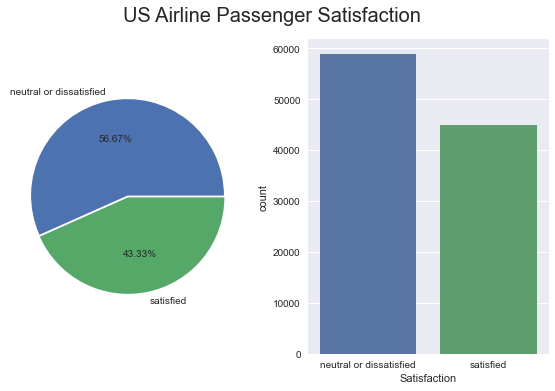

In [25]:
# Perbandingan penumpang 'puas' dan 'netral atau tidak puas'
plt.style.use('seaborn')
plt.figure().suptitle('US Airline Passenger Satisfaction', fontsize=20)
plt.subplot(1,2,1)
plt.pie(dfnew['Satisfaction'].value_counts(), labels=['neutral or dissatisfied','satisfied'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=dfnew, x='Satisfaction')
plt.tight_layout()
plt.show()  

Dari grafik diatas dapat dilihat bahwa lebih banyak penumpang yang netral atau tidak puas dengan pelayanan yang diberikan maskapai penerbangan AS sampai saat ini, sebanyak 56,67%. Perusahaan harus membuat perubahan pada pelayanan yang diberikan, untuk meningkatkan kepuasan pelanggan kedepannya. Mengetahui faktor yang mempengaruhi kepuasan pelanggan akan mempermudah perusahaan dalam pengambilan keputusan perbaikan.

### Faktor yang mempengaruhi kepuasan penumpang
Faktor apa saja yang mempengaruhi kepuasan penumpang dapat dijadikan acuan untuk mengetahui aspek mana yang dapat dipertahankan dan aspek mana yang harus dilakukan perbaikan

Analisa faktor yang mempengaruhi kepuasan penumpang dilakukan dengan cara melakukan segmentasi penumpang sesuai klasifikasi penumpang (usia, tipe travel, *gender*,dsb), setelah itu akan dilihat perbandingan nilai rating yang diberikan dan kepuasan sesuai dengan segmentasi untuk mengetahui area mana yang harus di*improve*, serta akan dilakukan analisa apabila ada hubungan diantara aspek-aspek yang dianalisa. 

#### Fungsi yang digunakan untuk analisa
Untuk mempersingkat analisa, dibuat fungsi sesuai dengan kebutuhannya. Semua fungsi yang digunakan dirangkum disini.

In [26]:
# Fungsi Tabel Kategori terhadap Kepuasan Penumpang
def TabelProporsiKepuasan(Data,Satisfaction,df):
    # Membuat crosstab
    Jumlah = pd.crosstab(df[Data],df[Satisfaction])
    Proporsi=pd.crosstab(df[Data],df[Satisfaction],normalize='index').round(4)*100
    # Menggabungkan Tabel
    TabelKepuasan = pd.merge(Jumlah, Proporsi,on=Data)
    TabelKepuasan.insert(2,'Total',(pd.crosstab(df[Data],df[Satisfaction]).sort_index().sum(axis=1)))
    TabelKepuasan.rename(columns={'neutral or dissatisfied_x':'Neutral_Dissatisfied_Val','satisfied_x':'Satisfied_Val', 'neutral or dissatisfied_y':'Neutral_Dissatisfied_%','satisfied_y':'Satisfied_%'},inplace=True)
    return TabelKepuasan
    
RatingCol = TabelRating.select_dtypes(include =['int64','float64']).columns
def Rating(category,data):
    fig, axs = plt.subplots(7, 2, figsize=(15, 15))
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(RatingCol,axs.ravel()):
        ax = pd.crosstab(data[feature],data[category]).plot(ax=ax,kind='bar', stacked=True)
        



####

#### Berdasarkan Segmentasi
Berikutnya akan dilakukan pengamatan berdasarkan klasifikasi penumpang, dimana akan dianalisa pengaruh umur, tipe travel, gender, dan sebagainya terhadap kepuasan. Pada analisa ini beberapa data akan diukur menggunakan crosstabulation untuk mengetahui proporsi dan pengaruh kategori terhadap kepuasan penumpang, dan karena data non-parametrik dan bersifat nominal ('puas' dan 'netral atau tidak puas'), beberapa data yang digunakan adalah metode chi squared contingency untuk uji hipotesis hubungan, dan untuk proporsi digunakan z-test.

##### Berdasarkan Gender
Hal pertama yang akan dianalisa adalah apabila kepuasan penumpang dipengaruhi oleh gender. 

Data gender berisi *male*(laki-laki) dan *female*(perempuan). Untuk mengetahui value dan proporsi, digunakan fungsi tabel proporsi kepuasan. 

In [27]:
TabelProporsiKepuasan('Gender','Satisfaction',dfnew)

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Gender,,,,,
Female,30193,22534,52727,57.26,42.74
Male,28686,22491,51177,56.05,43.95


Text(0, 0.5, 'Proportion')

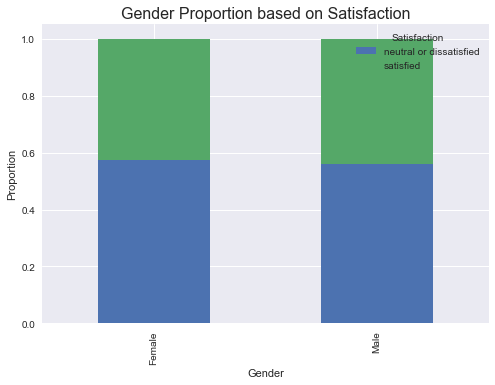

In [28]:
# Visualisasi proporsi berdasarkan gender
plt.style.use('seaborn')
ct=pd.crosstab(dfnew['Gender'],dfnew['Satisfaction'],normalize='index').sort_index()
ct.plot(kind='bar', stacked=True)
plt.title('Gender Proportion based on Satisfaction', fontsize=16)
plt.ylabel('Proportion')


Dari data diatas, dapat dipahami bahwa proporsi perempuan dan laki-laki memiliki selisih yang sedikit. Untuk masing-masing gender cenderung tidak puas dengan pelayanan yang diberikan. 

In [29]:
# Menguji hipotesis apabila gender mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(dfnew['Gender'],dfnew['Satisfaction'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Dari uji statistik diatas, dapat diketahui bahwa meskipun proporsi laki-laki dan perempuan hampir sama, tetapi hasil uji statistik adalah Tolak Ho atau tidak ada cukup bukti bahwa gender tidak mempengaruhi kepuasan pelanggan, sehingga akan dilakukan analisa lebih lanjut, yaitu akan dilakukan perbandingan kepuasan penumpang perkategori dan dilihat nilai kepuasan per gender. 

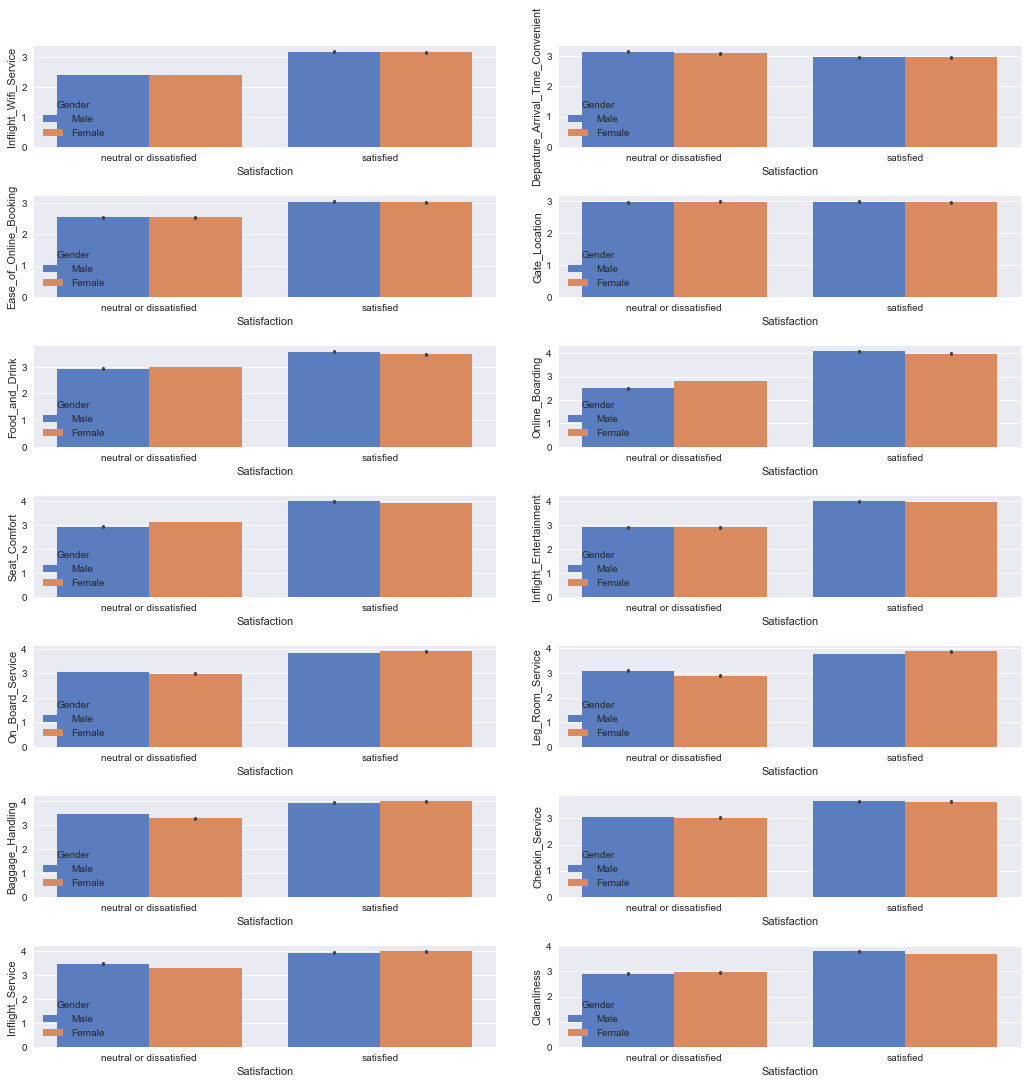

In [30]:
# Perbandingan kepuasan perempuan dan laki-laki untuk setiap kategori
RatingCol = TabelRating.select_dtypes(include =['int64','float64']).columns

def detail_barplot(category):
    fig, axs = plt.subplots(7, 2, figsize=(15, 15))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(RatingCol,axs.ravel()):
        ax = sns.barplot(ax=ax,x="Satisfaction", y=feature, hue=category,palette= 'muted', data=dfnew)

detail_barplot("Gender")

Dari grafik kepuasan penumpang perempuan dan laki-laki diatas, dapat dilihat bahwa laki-laki dan perempuan memiliki preferensi tertentu dalam menilai puas atau tidak. Seperti contohnya, dilihat dari netral atau tidak puas, perempuan cenderung lebih memperhatikan aspek kenyamanan kursi, makanan dan minuman, kebersihan, sedangkan laki-laki memperhatikan ruang kaki dalam pesawat, penanganan bagasi, service check-in dan dalam pesawat. Gender memberi pengaruh pada kepuasan penumpang apabila dilihat dari aspek diatas, akan tetapi sulit untuk melanjutkan segmentasi berdasarkan gender karena perbedaan laki-laki dan perempuan tidak terlalu signifikan. 

##### Berdasarkan Tipe Customer
Berikutnya akan dianalisa pengaruh Tipe Customer pada kepuasan penumpang

Tipe Customer dibagi menjadi 2 kategori, yaitu loyal customer dan disloyal customer. Pelanggan setia penting bagi bisnis karena hubungan baik dengan pelanggan dapat membuat bisnis bertahan lama. Akan dilihat proporsi kepuasan penumpang berdasarkan tipe customer.

In [31]:
# Membuat proporsi kepuasan penumpang berdasarkan tipe customer
TabelProporsiKepuasan('Customer_Type','Satisfaction',dfnew)

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Customer_Type,,,,,
Loyal Customer,44390,40533,84923,52.27,47.73
disloyal Customer,14489,4492,18981,76.33,23.67


In [32]:
# Visualisasi proporsi berdasarkan tipe customer
fig=px.sunburst(dfnew,path=['Customer_Type','Satisfaction'],color='Satisfaction', title=f'Customer Type Proportion based on Satisfaction')
fig.show()

In [33]:
# Menguji hipotesis apabila tipe customer mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(dfnew['Customer_Type'],dfnew['Satisfaction'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Dari data diatas, dapat dilihat bahwa Loyal Customer dan Disloyal Customer netral atau tidak puas dengan pelayanan yang diberikan. Proporsi customer baru yang memilih netral atau tidak puas cukup signifikan yaitu 76.33%, dapat diartikan bahwa pelayanan baru-baru ini kurang sesuai dengan harapan penumpang. Loyal Customer lebih banyak dibanding disloyal customer, hal ini dapat jadi pertanda bahwa lebih banyak customer lama yang menggunakan pelayanan Maskapai penerbangan AS, dan sedikitnya customer baru. Hal ini dapat dipengaruhi oleh dua hal, yaitu kualitas pelayanannya menurun atau kualitas pelayanan perlu direview karena tidak berbanding lurus dengan dinamika kebutuhan pelanggan. Dari hasil statistik dapat dipahami bahwa tipe customer mempengaruhi kepuasan penumpang. Kesimpulan yang dapat diambil terkait tipe penumpang, dapat dipahami bahwa **perusahaan juga harus memperbaiki pelayanan dan mencari strategi marketing baru agar customer baru datang dan disloyal customer dapat convert menjadi loyal customer.** 

##### Berdasarkan Usia Penumpang
Analisa usia penumpang terhadap kepuasan penumpang

Dari hasil survei, akan dilihat distribusi usia penumpang dikategorikan sesuai dengan kepuasan penumpang. 

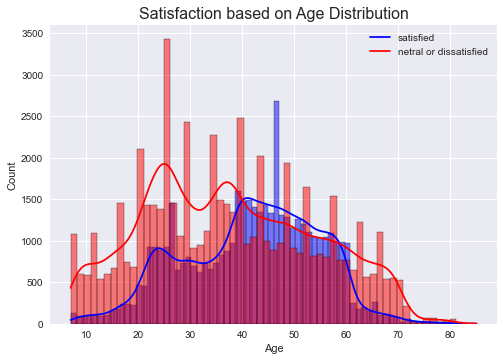

In [34]:
# Distribusi usia Penumpang
sns.histplot(x=dfnew[dfnew['Satisfaction']=='satisfied']['Age'],kde=True,color='blue')
sns.histplot(x=dfnew[dfnew['Satisfaction']=='neutral or dissatisfied']['Age'],kde=True,color='red')
plt.legend(labels=['satisfied','netral or dissatisfied'])
plt.title('Satisfaction based on Age Distribution', fontsize=16)
plt.show()

Dari grafik diatas, dapat dilihat sekilas bahwa distribusi tidak normal. Penumpang yang menjawab puas terhadap pelayanan maskapai berkisar diumur 40 sampai 55. Sedangkan penumpang yang menjawab tidak puas memiliki fluktuasi, berkisar dari umur 22 sampai 40. Akan dilakukan klasifikasi berdasarkan kategori umur, dan dianalisa lebih lanjut sebagai berikut. 

In [35]:
# Membuat Tabel proporsi umur
TabelUmur = dfnew.copy()

Usia akan dibagi menjadi [Kategori Usia sesuai dengan indikator yang ditetapkan BAPPENAS](https://sepakat.bappenas.go.id/wiki/Kelompok_Usia), yang telah diringkas:
* Di bawah 15 tahun: Kelompok usia anak-anak
* 15-24 tahun: Kelompok usia muda
* 25-34 tahun: Kelompok usia pekerja awal
* 35-44 tahun: Kelompok usia paruh baya
* 45-54 tahun: Kelompok usia pra-pensiun
* 55-64 tahun: Kelompok usia pensiun
* 65 tahun ke atas: Kelompok usia lanjut


In [36]:
# Pembuatan Tabel dengan tambahan kategori umur
def KategoriUmur (Umur): 
    if Umur < 15: 
        return "Anak-anak"
    elif (Umur >= 15) & (Umur < 25): 
        return "Usia Muda"
    elif (Umur >= 25) & (Umur < 35):
        return "Pekerja Awal"
    elif (Umur >= 35) & (Umur < 45):
        return "Paruh Baya"
    elif (Umur >= 45) & (Umur < 55):
        return "Pra-pensiun"
    elif (Umur >= 55) & (Umur < 65):
        return "Pensiun"
    elif Umur>=65:
        return "Usia Lanjut"
    
TabelUmur["KategoriUmur"] = TabelUmur["Age"].apply(lambda Umur: KategoriUmur(Umur))
# Proporsi Umur terhadap Kepuasan Penumpang
ProporsiUmur = TabelProporsiKepuasan('KategoriUmur','Satisfaction',TabelUmur)
ProporsiUmur

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
KategoriUmur,,,,,
Anak-anak,4505,725,5230,86.14,13.86
Paruh Baya,11974,12158,24132,49.62,50.38
Pekerja Awal,12454,7269,19723,63.14,36.86
Pensiun,7163,6901,14064,50.93,49.07
Pra-pensiun,9020,12402,21422,42.11,57.89
Usia Lanjut,3873,875,4748,81.57,18.43
Usia Muda,9890,4695,14585,67.81,32.19


Text(0, 0.5, 'Proportion')

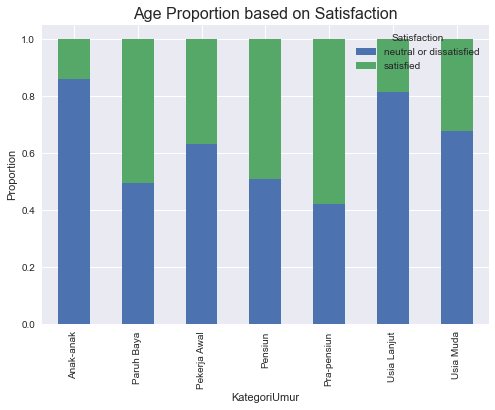

In [37]:
# Visualisasi proporsi berdasarkan umur secara keseluruhan
fig=px.sunburst(TabelUmur,path=['KategoriUmur','Satisfaction'],color='Satisfaction', title=f' Overall Age Proportion based on Satisfaction')
fig.show()

# Visualisasi proporsi berdasarkan umur per kategori
plt.style.use('seaborn')
ct=pd.crosstab(TabelUmur['KategoriUmur'],TabelUmur['Satisfaction'],normalize='index').sort_index()
ct.plot(kind='bar', stacked=True)
plt.title('Age Proportion based on Satisfaction', fontsize=16)
plt.ylabel('Proportion')

Terdapat beberapa kesimpulan dari data diatas, antara lain:
* Segmen penumpang berdasarkan umur paling banyak adalah kelompok Paruh Baya, Pra-pensiun dan Pekerja Awal
* Segmen penumpang dengan kategori umur yang cukup puas dengan pelayanan adalah kelompok Paruh Baya, Pra-pensiun, dan Pensiun dengan persentase kepuasan 49,0% - 57,9%, dan kelompok Pra-pensiun merupakan kelompok yang cenderung puas. 
* Segmen penumpang yang menjawab dominan 'netral atau tidak puas' dengan persentase diatas 80,0% adalah kelompok Anak-anak dan Usia Lanjut, meskipun persentase netral atau tidak puas cukup tinggi, proporsi kelompok tersebut kecil, dapat diketahui pasar penumpang Maskapai Penerbangan AS tidak didominasi oleh kelompok ini. Selain itu diharapkan untuk kelompok Anak-anak sebagai responden, masih didampingi oleh orang tua sesuai dengan etika penelitian, sehingga data diamati secara valid.
* Segmen penumpang yang cenderung 'netral dan tidak puas' merupakan kelompok Usia Muda dan Pekerja Awal, dengan persentase 'netral atau tidak puas' diatas 63,0%. Selain itu segmen penumpang ini memiliki proporsi yang tinggi, sehingga dapat dapat diambil kesimpulan bahwa kelompok ini mendominasi pasar penumpang Maskapai Penerbangan AS (yang 'netral atau tidak puas'), dan harus dianalisa lebih lanjut sebagai pengaruh kepuasan penumpang untuk mengetahui aspek apa saja yang menjadi faktor 'netral atau tidak puas'.

In [38]:
# Menguji hipotesis apabila Umur mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(TabelUmur['KategoriUmur'],TabelUmur['Satisfaction'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Uji statistik chi squared contingency menunjukkan Tolak Ho, dimana Ho adalah tidak ada nya pengaruh dari umur terhadap kepuasan. Sehingga dari Tolak Ho dibuktikan bahwa adanya pengaruh umur terhadap kepuasan penumpang. Analisa akan dilanjutkan berdasarkan kelompok Pekerja Awal dan Usia Muda.

In [39]:
# Mengambil baris berdasarkan Kelompok Usia Muda dan Pekerja Awal
indexNames = TabelUmur[TabelUmur['KategoriUmur'].isin(['Anak-anak','Paruh Baya','Pensiun','Pra-pensiun','Usia Lanjut'])].index
TabelUmur.drop(indexNames, inplace=True)
TabelUmur['KategoriUmur'].unique()

array(['Pekerja Awal', 'Usia Muda'], dtype=object)

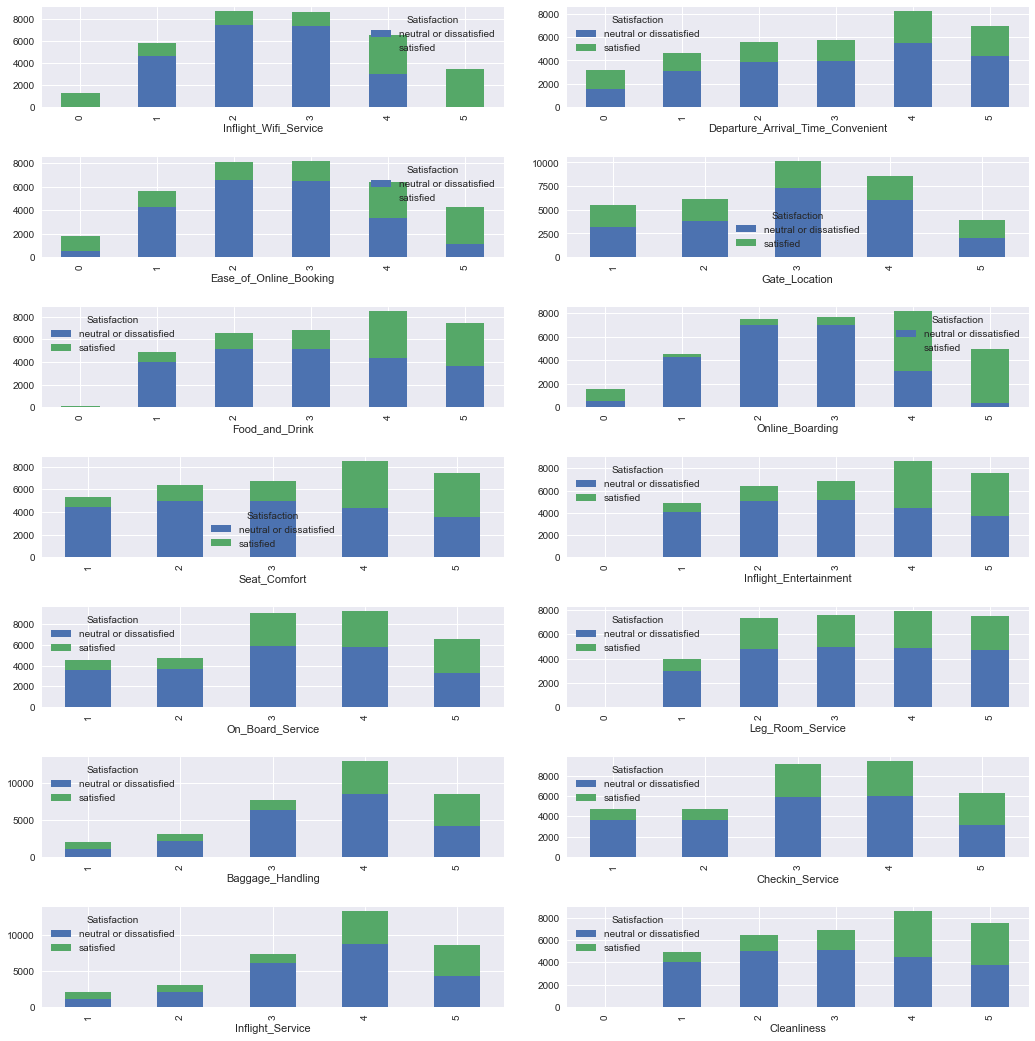

In [40]:
# Faktor yang mempengaruhi kepuasan penumpang dilihat dari perbandingan isi rating dan kepuasan berdasarkan umur
Rating("Satisfaction",TabelUmur)


Dari grafik nilai rating terhadap kepuasan penumpang kelompok Usia Muda dan Pekerja Awal diatas, beberapa hal dapat disimpulkan:
* Dapat dilihat aspek mana saja yang mempengaruhi kepuasan dilihat dari jumlah rating dan kepuasan. Seperti contohnya, banyaknya orang mengisi nilai 4 pada aspek Departure Arrival Time Convenient, tetapi dominan penumpang tidak puas, sehingga aspek tersebut diasumsikan tidak terlalu mempengaruhi kepuasan berdasarkan usia.
* Dari nilai rating (0: Tidak diisi, 1(Buruk) sampai 5(Baik)), aspek yang mempengaruhi kelompok Usia Muda dan Pekerja Awal mengisi 'netral atau tidak puas' adalah Inflight Wifi Service(Wifi dalam penerbangan), Ease of Online Booking (Kemudahan booking secara online), dan Gate Location (Lokasi Gerbang). Sedangkan terdapat juga beberapa hal yang dapat ditingkatkan yaitu Online Boarding (Boarding secara online). 

##### Berdasarkan Tipe travel
Selanjutnya akan diperhatikan apabila tipe travel mempengaruhi kepuasan penumpang

Terdapat dua tipe travel yaitu Business Travel Dan Personal Travel. Pertama-tama akan dilihat proporsi dari masing-masing kategori seluruh penumpang.

In [41]:
# Membuat proporsi kepuasan penumpang berdasarkan tipe travel
TabelProporsiKepuasan('Type_of_Travel','Satisfaction',dfnew)

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Type_of_Travel,,,,,
Business travel,29909,41746,71655,41.74,58.26
Personal Travel,28970,3279,32249,89.83,10.17


In [42]:
# Visualisasi proporsi berdasarkan tipe travel
fig=px.sunburst(dfnew,path=['Type_of_Travel','Satisfaction'],color='Satisfaction', title=f'Type of Travel Proportion based on Satisfaction')
fig.show()

Dapat dilihat dari data diatas, bahwa penumpang yang menggunakan penerbangan untuk tujuan bisnis cenderung puas dengan layanan yang diberikan, yaitu 58,3%. Sedangkan penumpang yang menggunakan penerbangan untuk tujuan personal mengisi 'netral dan tidak puas' sampai dengan 89,8%. Karena terdapat perbedaan proporsi pada tipe bisnis dan personal, akan dilakukan uji proporsi z-test 1 tail, untuk mengetahui bahwa proporsi 'netral atau tidak puas' pada tipe personal lebih banyak atau tidak dari tipe bisnis.

In [43]:
# Uji proporsi z-test untuk memastikan proporsi netral atau tidak puas mana yang lebih besar, bisnis atau personal
df_ct=pd.crosstab(dfnew['Type_of_Travel'],dfnew['Satisfaction'])
BisnisNetral = df_ct['neutral or dissatisfied'][0]
PersonalNetral = df_ct['neutral or dissatisfied'][1]
TotalBisnis = df_ct.iloc[0,:].sum()
TotalPersonal = df_ct.iloc[1,:].sum()
DataNetral = np.array([BisnisNetral,PersonalNetral])
TotalData = np.array([TotalBisnis, TotalPersonal])

stats, pval=proportions_ztest(DataNetral,TotalData,alternative='smaller') 
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')


Tolak Ho


Dari Uji Z-test diatas, didapat Tolak Ho, dimana Ho adalah proporsi 'netral atau tidak puas' pada tipe bisnis lebih besar atau sama dengan tipe personal. Sehingga dapat diketahui bahwa proporsi 'netral atau tidak puas' pada tipe personal lebih besar daripada proporsi tipe bisnis. Maka untuk selanjutnya akan dilihat apa yang menyebabkan nilai 'netral atau tidak puas' pada tipe personal sangat signifikan.

In [44]:
# Dibuat tabel Khusus untuk Tipe Personal Travel
TabelTipeTravel = dfnew.copy()
# Mengambil baris personal travel
indexNames = TabelTipeTravel[TabelTipeTravel['Type_of_Travel'].isin(['Business travel'])].index
TabelTipeTravel.drop(indexNames, inplace=True)
TabelTipeTravel['Type_of_Travel'].unique()

array(['Personal Travel'], dtype=object)

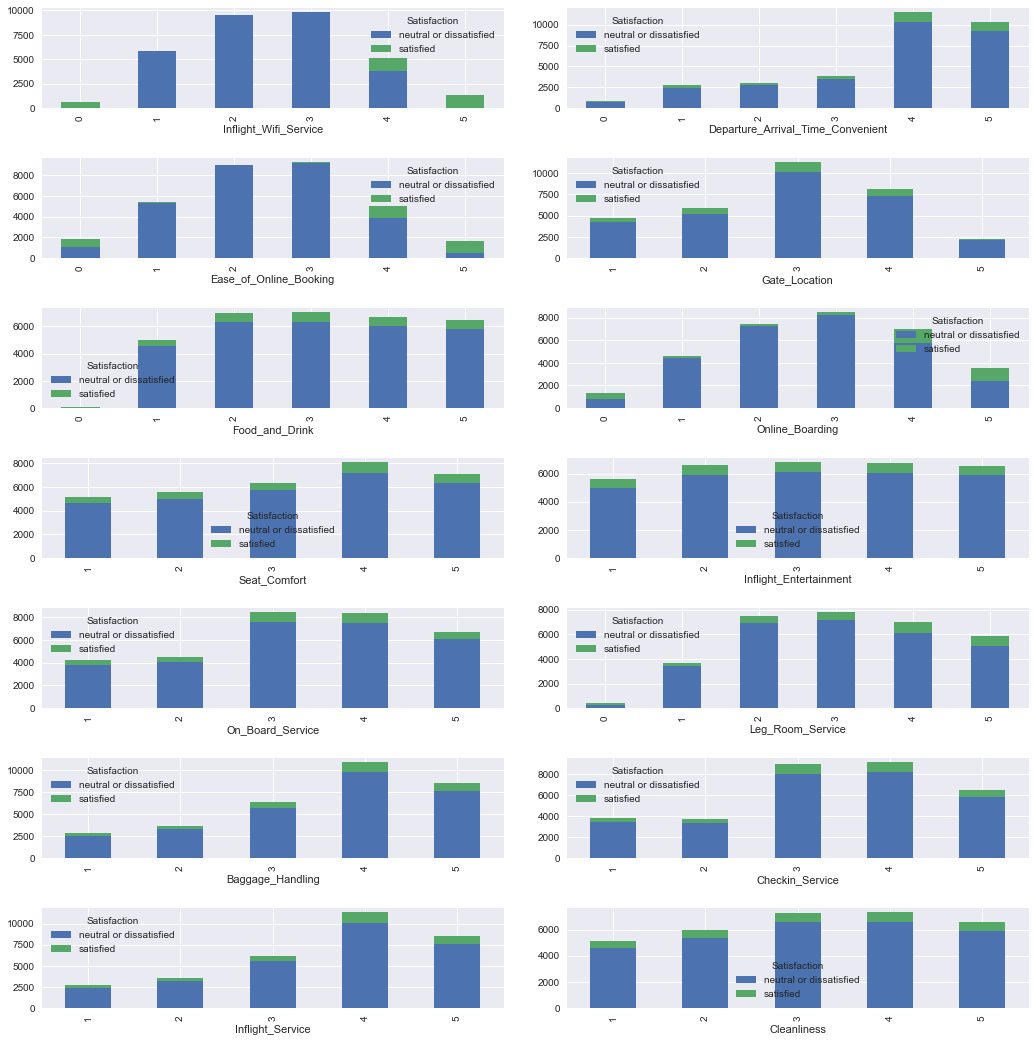

In [45]:
# Faktor yang mempengaruhi kepuasan penumpang dilihat dari perbandingan isi rating dan kepuasan berdasarkan Tipe Travel 
Rating('Satisfaction',TabelTipeTravel)

Dari grafik nilai rating terhadap kepuasan penumpang dengan tipe travel personal, beberapa hal dapat disimpulkan:
* Hal yang paling mempengaruhi tipe personal untuk memilih 'netral atau tidak puas' adalah inflight wifi service (wifi dalam penerbangan), ease of online booking (kemudahan booking online), gate location (lokasi gate), dan online boarding(boarding secara online). Dari data ini dapat disimpulkan bahwa secara garis besar faktor yang sangat mempengaruhi kepuasan berdasarkan tipe travel sama dengan pengelompokkan berdasarkan umur.
* Tetapi dalam tipe personal travel, ada beberapa aspek yang dapat ditingkatkan seperti food and drink (makanan dan minuman), inflight entertainment (hiburan dalam pesawat), dan seat comfort (kenyamanan kursi). 

##### Berdasarkan Kelas Penerbangan
Setelah itu hal yang dapat dianalisa adalah kepuasan berdasarkan kelas penerbangan

Terdapat tiga kelas penerbangan, yaitu Eco, Eco Plus, dan Business. Akan dilakukan analisa proporsi masing-masing kelas terhadap kepuasan.

In [46]:
# Membuat proporsi kepuasan penumpang berdasarkan kelas penerbangan
TabelProporsiKepuasan('Class','Satisfaction',dfnew)

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Class,,,,,
Business,15185,34480,49665,30.57,69.43
Eco,38044,8701,46745,81.39,18.61
Eco Plus,5650,1844,7494,75.39,24.61


Untuk analisa proporsi kelas, dapat dikelompokkan berdasarkan tipe travel, yaitu sebagai berikut

In [47]:
# Visualisasi proporsi berdasarkan Kelas penerbangan dengan klasifikasi tipe travel
plt.style.use('seaborn')
fig=px.sunburst(dfnew,path=['Type_of_Travel','Class','Satisfaction'],color='Satisfaction', title=f'Class Proportion based on Satisfaction classified by Type of Travel')
fig.show()

Apabila dilihat dari pie chart diatas, dapat disimpulkan beberapa hal:
* Kelas yang paling banyak digunakan adalah business dan eco
* Segmen penumpang berdasarkan tipe travel bisnis, cenderung menggunakan kelas bisnis dan cenderung 'puas', sedangakan yang menggunakan kelas eco dan eco plus cenderung 'netral atau tidak puas'
* Segmen penumpang berdasarkan tipe travel personal, cenderung menggunakan kelas eco dan memilih 'netral atau tidak puas' dan sangat signifikan. 
* Karena penumpang yang menggunakan kelas eco cukup tinggi, seharusnya pelayanan yang diberikan pada kelas ini lebih diperhatikan lagi.

##### Berdasarkan Flight Distance
Akan dilakukan analisa apabila flight distance mempengaruhi kepuasan penumpang

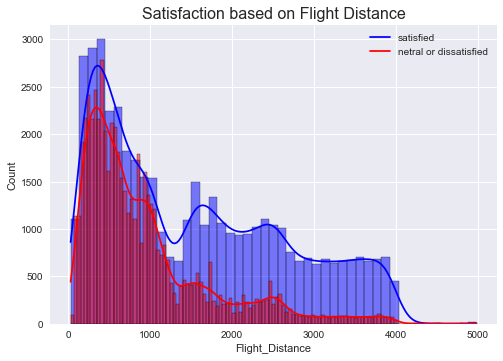

In [48]:
# Distribusi kepuasan penumpang berdasarkan flight distance
sns.histplot(x=dfnew[dfnew['Satisfaction']=='satisfied']['Flight_Distance'],kde=True,color='blue')
sns.histplot(x=dfnew[dfnew['Satisfaction']=='neutral or dissatisfied']['Flight_Distance'],kde=True,color='red')
plt.legend(labels=['satisfied','netral or dissatisfied'])
plt.title('Satisfaction based on Flight Distance', fontsize=16)
plt.show()

Dapat dilihat pada grafik diatas, bahwa penumpang cenderung puas apabila mengikuti penerbangan jauh atau diatas 1500miles, dan banyak penumpang yang mengisi 'netral atau tidak puas' dibawah 1500miles. 

In [49]:
# Akan dibagi menjadi 2 kelompok, dibawah 1500miles dan diatas 1500miles
TabelFlightDistance = dfnew.copy()
# Pembuatan Tabel dengan tambahan kategori jarak
def FungsiJarak (Jarak): 
    if Jarak < 1500: 
        return "Di bawah 1500miles"
    else:
        return "Di atas 1500miles"
    
TabelFlightDistance["KategoriJarak"] = TabelFlightDistance["Flight_Distance"].apply(lambda Jarak: FungsiJarak (Jarak))
# Proporsi jarak terhadap Kepuasan Penumpang
ProporsiJarak = TabelProporsiKepuasan('KategoriJarak','Satisfaction',TabelFlightDistance)
ProporsiJarak

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
KategoriJarak,,,,,
Di atas 1500miles,10741,20769,31510,34.09,65.91
Di bawah 1500miles,48138,24256,72394,66.49,33.51


In [50]:
# Visualisasi proporsi berdasarkan 
plt.style.use('seaborn')
fig=px.sunburst(TabelFlightDistance,path=['KategoriJarak','Class','Satisfaction'],color='Satisfaction', title=f'Class Proportion based on Satisfaction classified by Flight Distance')
fig.show()

Dari grafik diatas dapat disimpulkan bahwa untuk jarak dibawah 1500miles cenderung lebih banyak yang menggunakan tipe kelas eco, dan untuk diatas 1500miles lebih banyak yang menggunakan kelas business. Dari data ini dapat disimpulkan bahwa kepuasan penumpang terhadap jarak dipengaruhi dengan kelas yang digunakan. 

#### Nilai Rating secara General
Berikut akan dilihat nilai rating yang diberikan oleh penumpang secara general atau tidak menggunakan segmentasi

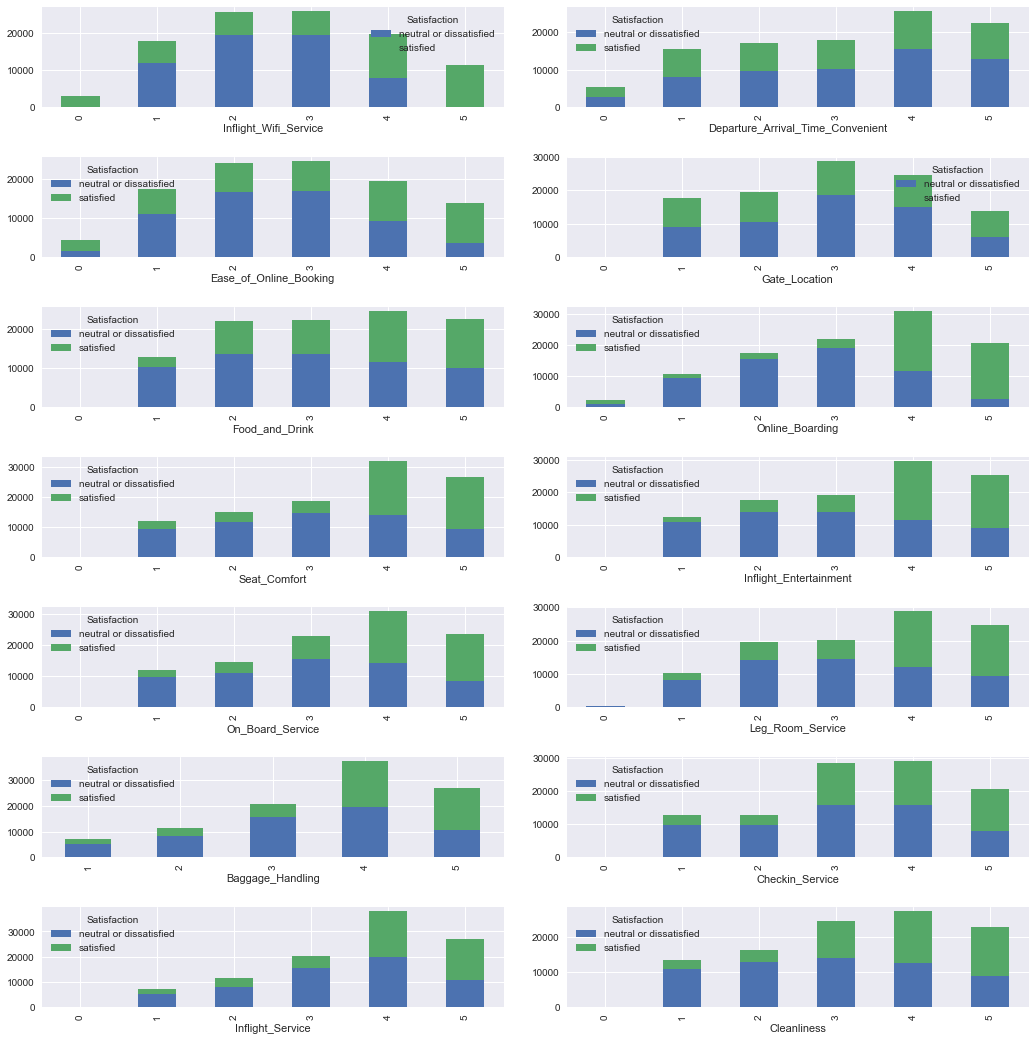

In [51]:
# Melihat Nilai Rating terhadap kepuasan secara general
Rating('Satisfaction',dfnew)

Selain hal dari segmentasi diatas, kita melihat nilai rating secara general. Dapat dilihat bahwa departure and arrival time convenient tidak menjadi pengaruh terhadap kepuasan pelanggan karena banyaknya yang menilai 4 dan 5 tetapi tetap tidak merasa puas. Sehingga untuk kolom Departure Delay in Minutes tidak dilakukan analisa lebih lanjut. 
Dapat diketahui juga bahwa nilai yang baik secara general diberikan untuk kenyamanan kursi, penanganan bagasi, pelayanan dalam penerbangan, hiburan dalam penerbangan, kebersihan, online boarding, dan pelayanan ruang kaki. Dari hasil ini dapat dilihat bahwa terdapat beberapa faktor berbeda yang dipengaruhi berdasarkan kelompok tipe personal atau pengguna eco, sehingga dapat disimpulkan bahwa pada kelas bisnis terdapat service yang lebih baik antara lain:
* kenyamanan kursi
* hiburan dalam pesawat
* pelayanan dalam penerbangan
* online boarding

##### Korelasi Nilai rating
Pada heatmap diatas, akan diamati kategori dengan koefisien korelasi diatas 0,4. Koefisien 0,4 sampai 0,6 menandakan kategori memiliki korelasi yang sedang, 0,6 sampai 0,8 menandakan korelasi yang cukup kuat, 0,8 sampai 1 menandakan korelasi yang sangat kuat. Untuk lebih jelasnya dapat dilihat [disini.](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html)


In [52]:
# Koefisien Korelasi spearman karena data tidak terdistribusi normal
dfnew.corr('spearman')

,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes
Age,1.000000,0.072321,0.016518,0.036161,0.022983,-0.002103,0.020841,0.215725,0.161383,0.081574,0.070441,0.051864,-0.026338,0.039724,-0.031062,0.053716,-0.010894
Flight_Distance,0.072321,1.000000,0.006456,-0.013443,0.066114,0.000750,0.046593,0.194100,0.137140,0.105091,0.099600,0.118062,0.060355,0.071707,0.059940,0.080697,0.026570
Inflight_Wifi_Service,0.016518,0.006456,1.000000,0.338860,0.711816,0.332789,0.132695,0.435733,0.118909,0.199700,0.116584,0.149572,0.113337,0.042710,0.105462,0.130628,-0.030202
Departure_Arrival_Time_Convenient,0.036161,-0.013443,0.338860,1.000000,0.439947,0.450214,0.002934,0.061735,0.011934,-0.009296,0.071701,0.007048,0.088548,0.099762,0.090800,0.013951,-0.002986
Ease_of_Online_Booking,0.022983,0.066114,0.711816,0.439947,1.000000,0.461921,0.029603,0.367667,0.026806,0.042821,0.037403,0.094560,0.037002,0.010690,0.035031,0.015249,-0.010656
Gate_Location,-0.002103,0.000750,0.332789,0.450214,0.461921,1.000000,-0.001142,-0.001374,0.001735,0.003030,-0.027975,-0.005588,-0.006472,-0.035812,-0.007133,-0.003750,0.004324
Food_and_Drink,0.020841,0.046593,0.132695,0.002934,0.029603,-0.001142,1.000000,0.241274,0.557754,0.610246,0.058136,0.031457,0.045529,0.083811,0.043877,0.647056,-0.021389
Online_Boarding,0.215725,0.194100,0.435733,0.061735,0.367667,-0.001374,0.241274,1.000000,0.440087,0.302319,0.175737,0.139163,0.118017,0.217763,0.108950,0.345629,-0.033044
Seat_Comfort,0.161383,0.137140,0.118909,0.011934,0.026806,0.001735,0.557754,0.440087,1.000000,0.603980,0.147481,0.119710,0.104604,0.199209,0.098379,0.667196,-0.020337
Inflight_Entertainment,0.081574,0.105091,0.199700,-0.009296,0.042821,0.003030,0.610246,0.302319,0.603980,1.000000,0.436907,0.314101,0.395773,0.121436,0.422208,0.680506,-0.027402


<AxesSubplot:>

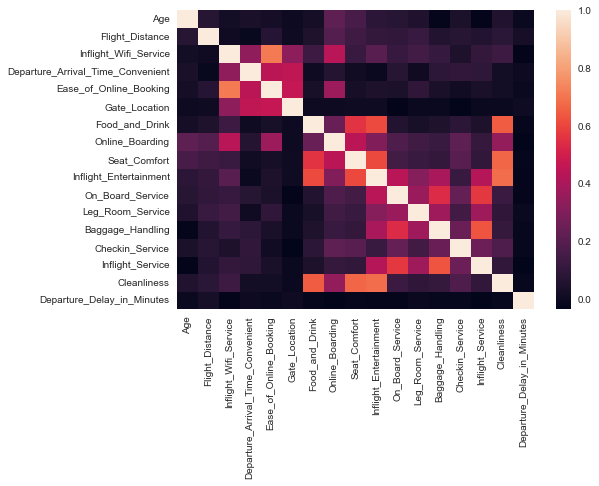

In [53]:
# Melihat korelasi antar variabel dalam tabel
sns.heatmap(dfnew.corr('spearman'))

Dari heatmap diatas, dapat diperhatikan bahwa beberapa variabel memiliki korelasi yang cukup tinggi, hal ini dapat diakibatkan karena penilaian yang berhubungan, misalnya, orang memilih nilai rendah untuk kemudahan online booking dan juga nilai rendah pada wifi dalam penerbangan. Contoh lain adalah nilai pada makanan dan minuman dikatakan cukup, juga pada kebersihan.  

## Kesimpulan dan Rekomendasi
Setelah dilakukan analisa, didapat kesimpulan dan rekomendasi untuk meningkatkan pelayanan Maskapai Penerbangan AS

#### Kesimpulan

Adapun kesimpulan yang didapat dari hasil analisa, antara lain:  
1. **Apakah penumpang merasa puas dengan layanan yang diberikan?**
* Penumpang maskapai penerbangan AS cenderung netral atau tidak puas terhadap pelayanan yang diberikan, dengan persentase 56,7%

* Loyal Customer lebih banyak dibanding disloyal customer, hal ini dapat jadi pertanda bahwa lebih banyak customer lama yang menggunakan pelayanan Maskapai penerbangan AS, dan sedikitnya customer baru, hal ini didorong dengan proporsi disloyal customer menilai netral dan tidak puas cukup signifikan, yaitu 76,3%, dapat diartikan bahwa pelayanan baru-baru ini kurang sesuai dengan harapan penumpang. 

* Kelompok Usia Muda dan Pekerja Awal cenderung mengisi 'netral atau tidak puas' dengan masing-masing persentase diatas 63,0%, dan kelompok tersebut termasuk kelompok yang mendominasi pasar penumpang yang merasa pelayanan tidak memenuhi harapan penumpang

* Penumpang dengan tujuan travel personal lebih tidak puas dibandingkan penumpang dengan tujuan bisnis, hal ini disebabkan karena tujuan travel personal lebih banyak menggunakan kelas ekonomi. Persentase penumpang 'netral atau tidak puas' yang menggunakan kelas ekonomi sangat tinggi yaitu sebesar 89,4%. 

* Orang yang menggunakan kelas bisnis cenderung puas dengan pelayanan yang diberikan, dengan persentase puas 69,4%. Semakin jauh destinasi, orang cenderung menggunakan kelas bisnis.
  
2. **Apa saja faktor yang mempengaruhi kepuasan penumpang?**
* Penumpang memilih 'netral atau tidak puas' paling dipengaruhi oleh beberapa faktor:
    * Umur:  
        Kelompok Usia Muda dan Pekerja Awal menilai rendah aspek berikut:
        * Wifi dalam penerbangan
        * Kemudahan booking secara online
        * Lokasi Gerbang   
        Hal yang cukup tapi dapat ditingkatkan:
        * Boarding secara online
    * Tipe travel dan kelas:  
        Penumpang dengan tujuan personal dan menggunakan kelas ekonomi menilai rendah aspek berikut:
        * Wifi dalam penerbangan
        * Kemudahan booking secara online
        * Lokasi Gerbang
        * Boarding Secara Online  
        Hal yang cukup tapi dapat ditingkatkan:
        * Minuman dan makanan
        * Hiburan dalam penerbangan
        * Kenyamanan kursi  
  
* Penumpang kelas bisnis mendapat service yang lebih baik antara lain:
    * Kenyamanan kursi
    * Hiburan dalam pesawat
    * Boarding secara online



#### Rekomendasi

Adapun rekomendasi yang dapat diberikan antara lain:
* Hal yang paling harus diperhatikan adalah mengganti wifi dalam penerbangan dengan kualitas yang lebih baik mengingat tingginya demand penggunaan wifi saat travel. Selain itu kemudahan booking secara online dan boarding secara online, yang dapat ditingkatkan dengan membuat aplikasi dengan fitur yang lebih mengikuti jaman atau up-to-date sehingga lebih mudah dimengerti dan memudahkan penumpang dalam online booking dan online boarding
* Selain itu lokasi gate dapat disesuaikan agar tidak jauh dari pesawat, sehingga penumpang tidak lelah saat boarding
* Kita bisa mengacu pada service di kelas bisnis yang dinilai baik seperti meningkatkan kenyamanan kursi, makanan dan minuman, dan hiburan dalam pesawat pada kelas ekonomi, mengingat pengguna kelas ekonomi mendominasi pasar dan tidak puas terhadap layanan sekarang
* Strategi marketing dapat menggunakan kelompok usia muda dan pekerja awal sebagai target pasar untuk mencari *lead* customer baru dan meng-*convert* disloyal customer menjadi loyal customer

Dengan mencari faktor yang mempengaruhi kepuasan penumpang, diharapkan analisa ini dapat membantu meningkatkan kualitas pelayanan Maskapai Penerbangan AS